In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\mipo\OneDrive - Hillyard, Inc\Desktop\GitHub\hillyard_routing_analysis\Resources/routing_analysis.csv"
data = pd.read_csv(file_path)

In [4]:
selected_columns = ['Latitude', 'Longitude', 'Total Orders', 'Total Deliveries', 'Avg. Revenue']
X = data[selected_columns]

In [5]:
X.fillna(0, inplace=True)

C:\Users\mipo\AppData\Local\Temp\ipykernel_27656\2534066105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [8]:
k = 25  # Example: Choosing 25 clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


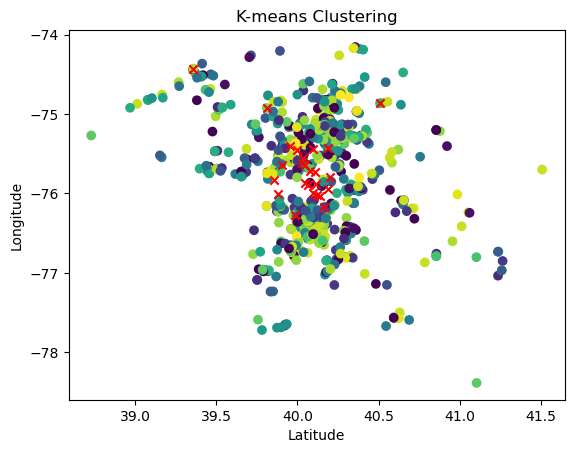

In [9]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [10]:
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Latitude = {centroid[0]}, Longitude = {centroid[1]}")

Cluster Centroids:
Cluster 1: Latitude = 40.11530947435897, Longitude = -75.88308384615385
Cluster 2: Latitude = 40.1903765, Longitude = -75.4225385
Cluster 3: Latitude = 39.356286, Longitude = -74.435967
Cluster 4: Latitude = 40.07955658823529, Longitude = -75.718928
Cluster 5: Latitude = 40.14073793650794, Longitude = -76.0263365079365
Cluster 6: Latitude = 39.984759, Longitude = -76.266395
Cluster 7: Latitude = 40.043388923076925, Longitude = -75.64413023076924
Cluster 8: Latitude = 40.04873739285714, Longitude = -75.86675917857143
Cluster 9: Latitude = 39.8559678, Longitude = -75.8273496
Cluster 10: Latitude = 39.95257963636364, Longitude = -75.40047563636364
Cluster 11: Latitude = 40.12100725925926, Longitude = -76.01593824691358
Cluster 12: Latitude = 39.8802967, Longitude = -76.0068364
Cluster 13: Latitude = 40.10962184126984, Longitude = -75.73535976190476
Cluster 14: Latitude = 39.90367357142857, Longitude = -75.63670028571428
Cluster 15: Latitude = 39.99676417391304, Longitud

In [11]:
cluster_centroids_df = pd.DataFrame(centroids, columns=X.columns)
cluster_centroids_df

,Latitude,Longitude,Total Orders,Total Deliveries,Avg. Revenue
0,40.115309,-75.883084,12.371795,16.294872,720.707863
1,40.190376,-75.422539,14.200000,23.500000,5033.521795
2,39.356286,-74.435967,9.000000,13.000000,29764.981110
3,40.079557,-75.718928,14.470588,26.205882,2108.667449
4,40.140738,-76.026337,10.587302,12.444444,247.308394
5,39.984759,-76.266395,13.000000,21.000000,9873.292308
6,40.043389,-75.644130,10.846154,18.692308,3141.052128
7,40.048737,-75.866759,11.607143,18.571429,1473.560872
8,39.855968,-75.827350,11.800000,20.800000,6760.469326
9,39.952580,-75.400476,12.363636,19.681818,2815.803798


In [12]:
cluster_counts = pd.Series(labels).value_counts().sort_index()
cluster_centroids_df['Location Count'] = cluster_counts.values
cluster_centroids_df

,Latitude,Longitude,Total Orders,Total Deliveries,Avg. Revenue,Location Count
0,40.115309,-75.883084,12.371795,16.294872,720.707863,78
1,40.190376,-75.422539,14.200000,23.500000,5033.521795,10
2,39.356286,-74.435967,9.000000,13.000000,29764.981110,1
3,40.079557,-75.718928,14.470588,26.205882,2108.667449,34
4,40.140738,-76.026337,10.587302,12.444444,247.308394,62
5,39.984759,-76.266395,13.000000,21.000000,9873.292308,1
6,40.043389,-75.644130,10.846154,18.692308,3141.052128,13
7,40.048737,-75.866759,11.607143,18.571429,1473.560872,28
8,39.855968,-75.827350,11.800000,20.800000,6760.469326,5
9,39.952580,-75.400476,12.363636,19.681818,2815.803798,22


In [13]:
data['Cluster'] = labels
data

,Account Manager,Sold To ID,Sold To Name,Ship To ID,Ship To ID.1,Ship To City,Street Address,State,Ship To Zip Code,Full Address,...,Total Deliveries,Avg. Deliveries,Avg. Lines,Avg. Revenue,Total Revenue,Avg. GP,Total GP,Quantity,Margin,Cluster
0,Robert Diller (0000142017),239004,WILLOW VALLEY MED LKS MNR FLR#,239004,WILLOW VALLEY MED LKS MNR FLR#,Willow Street,300 Willow Valley Lakes Dr,PA,17584,"300 Willow Valley Lakes Dr Willow Street, PA 1...",...,41,1.782609,4.086957,675.345652,15532.95,165.515652,3806.86,263.0,0.245083,0
1,Robert Diller (0000142017),239133,AGGREGATES EQUIPMENT#,239133,AGGREGATES EQUIPMENT#,Leola,9 Horseshoe Rd,PA,17540,"9 Horseshoe Rd Leola, PA 17540",...,7,1.166667,1.666667,310.223333,1861.34,114.120000,684.72,22.0,0.367864,4
2,Pete Annick (0000142010),239139,AKRON GRACE EC CHURCH,239139,AKRON GRACE EC CHURCH,AKRON,101 N 7th St,PA,17501,"101 N 7th St AKRON, PA 17501",...,7,1.000000,5.000000,509.685714,3567.80,217.741429,1524.19,85.0,0.427207,22
3,Matthew Morris (0000142013),239188,ANTIETAM SCHOOL DISTRICT,239188,ANTIETAM SCHOOL DISTRICT,Reading,201 N 25TH ST,PA,19606,"201 N 25TH ST Reading, PA 19606",...,27,1.588235,4.294118,1762.868235,29968.76,670.474706,11398.07,542.0,0.380332,23
4,Brad Miller (0000142022),239198,ARCHETYPE,239198,ARCHETYPE,Lancaster,317 N Market St,PA,17603,"317 N Market St Lancaster, PA 17603",...,7,1.166667,2.500000,199.108333,1194.65,74.256667,445.54,25.0,0.372946,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Brian Deiling (0000142018),239929,East Lycoming School District,483025,Hughesville JR/SR High School,Hughesville,349 Cemetery St,PA,17737,"349 Cemetery St Hughesville, PA 17737",...,36,1.500000,5.125000,2454.632500,58911.18,887.380000,21297.12,894.0,0.361512,15
710,Brian Deiling (0000142018),239929,East Lycoming School District,483026,Askar Elementary School,Hughesville,350 S Broad St,PA,17737,"350 S Broad St Hughesville, PA 17737",...,11,1.375000,6.125000,1513.150000,12105.20,547.622500,4380.98,335.0,0.361909,7
711,Brian Deiling (0000142018),272199,BYRON ENTERPRISES,483291,BYRON ENTERPRISES,Pottsville,2125 W Norwegian St,PA,17901,"2125 W Norwegian St Pottsville, PA 17901",...,8,1.000000,2.375000,223.756250,1790.05,90.208750,721.67,26.0,0.403156,4
712,Matthew Morris (0000142013),239963,ELITE SPORTSWEAR,483389,ELITE SPORTSWEAR,Reading,2525 N 12th St # 9-12,PA,19605,"2525 N 12th St # 9-12 Reading, PA 19605",...,21,1.909091,5.272727,518.694546,5705.64,171.493636,1886.43,328.0,0.330625,22


In [15]:
cluster_centroids_df.to_csv("1430_cluster_centroids_25.csv", index=False)
data.to_csv("1430_custered_stops_25.csv", index=False)